In [14]:
import pandas as pd 
import h5py
import numpy as np
import matplotlib.pyplot as plt

number of occurences: 7588


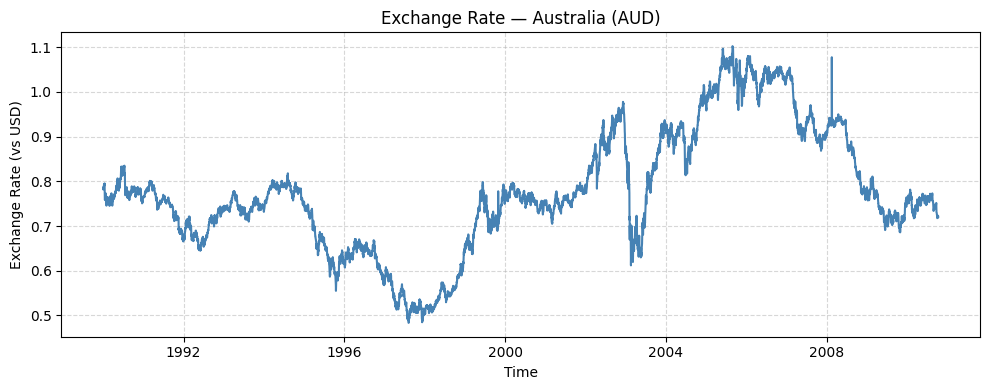

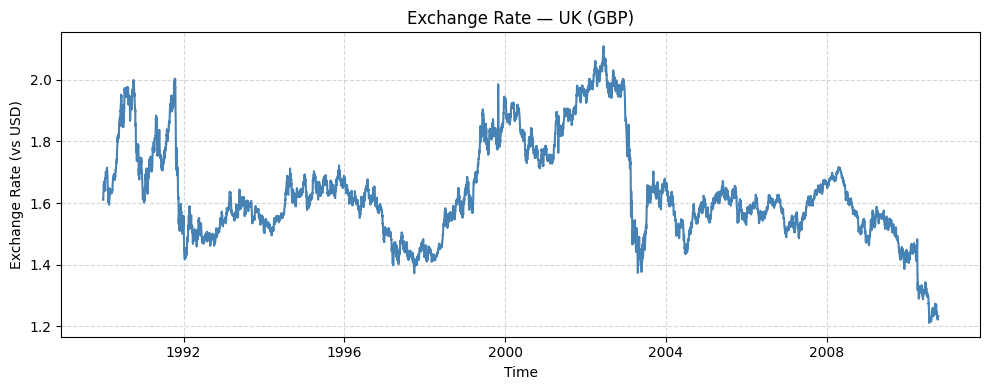

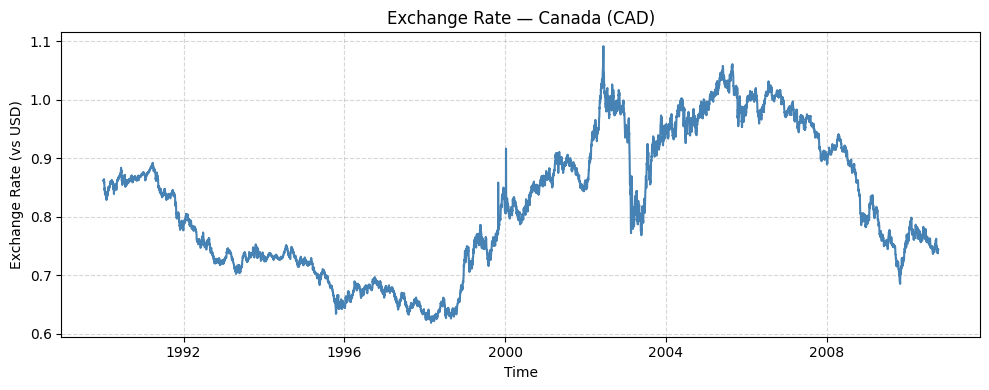

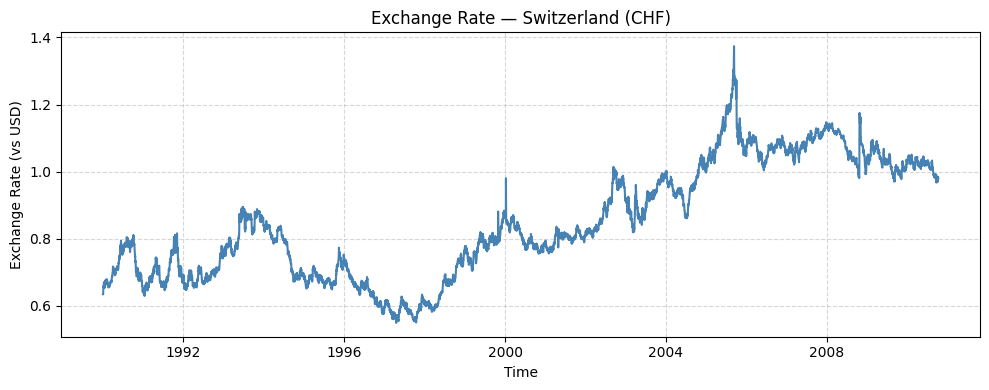

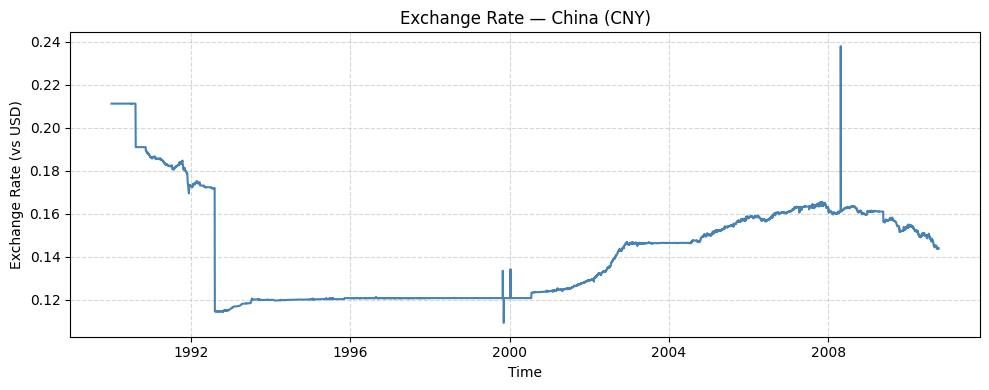

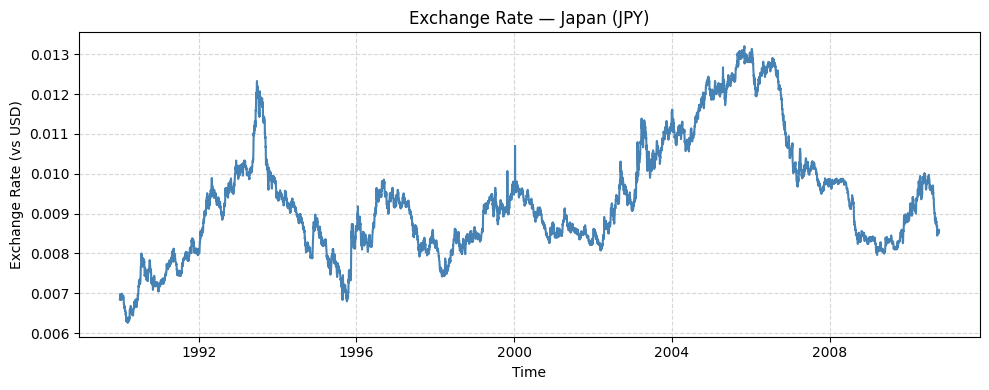

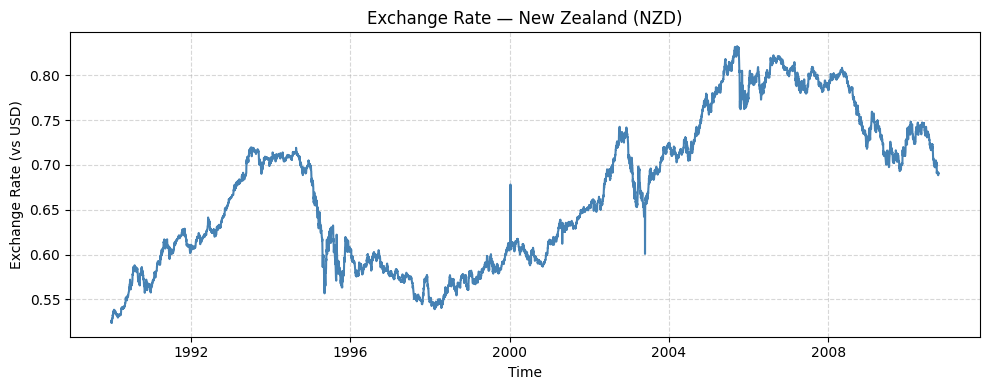

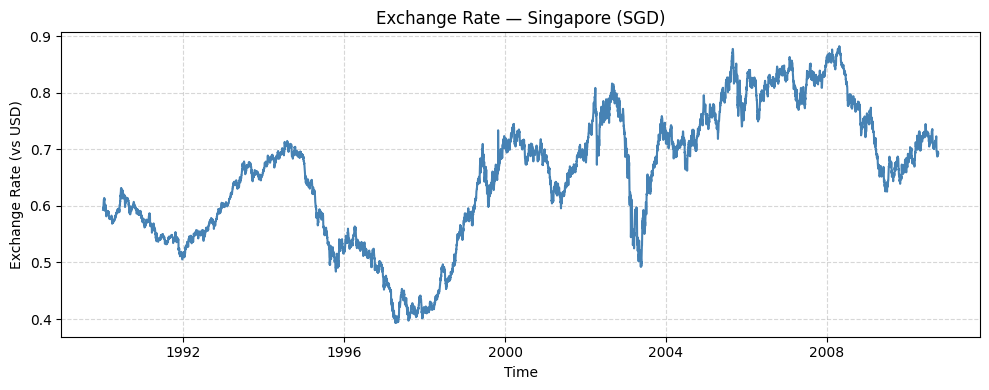

In [43]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "./raw_data/exchange_rate.h5"

with h5py.File(file, "r") as f:
    RawData = np.array(f["raw_data"])
    time = np.array(f["time"])
    print("number of occurences:", len(time)) # check the keys

# --- Clean up shapes ---
RawData = np.squeeze(RawData)  # (7588, 8, 1) -> (7588, 8)

# --- Decode time info ---
time = [t.decode() for t in time]
time = pd.to_datetime(time)

# the nodes names are find here https://arxiv.org/abs/1703.07015
node_names = [
    "Australia (AUD)",
    "UK (GBP)",
    "Canada (CAD)",
    "Switzerland (CHF)",
    "China (CNY)",
    "Japan (JPY)",
    "New Zealand (NZD)",
    "Singapore (SGD)"
]

# --- Plot each node ---
for i in range(RawData.shape[1]):
    plt.figure(figsize=(10, 4))
    plt.plot(time, RawData[:, i], color="steelblue")
    plt.title(f"Exchange Rate — {node_names[i]}")
    plt.xlabel("Time")
    plt.ylabel("Exchange Rate (vs USD)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [33]:
import pandas as pd

df = pd.read_csv("./raw_data/AirQualityUCI.csv")

(df['Date']==-200).sum()
(df['Time']==-200).sum()

np.int64(0)

In [34]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139


In [35]:
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y') 

In [36]:
df.set_index('Date',inplace=True)

In [37]:
df

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
2004-03-10,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2004-03-10,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
2004-03-10,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
2004-03-10,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
2005-04-04,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
2005-04-04,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406


Columns to plot: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


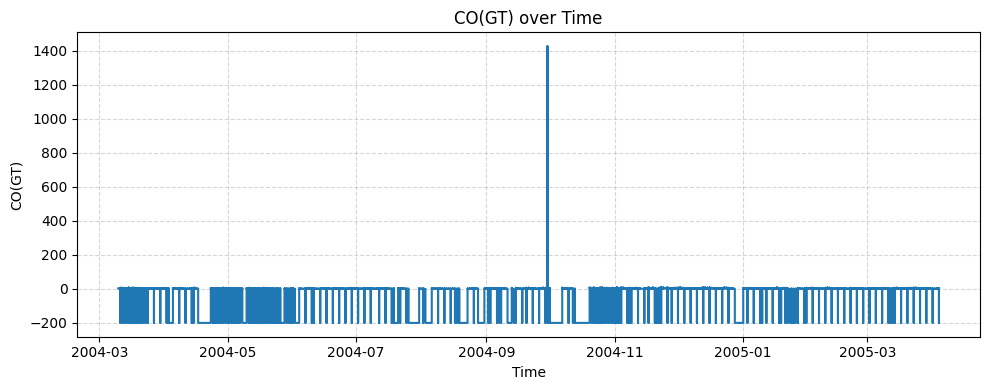

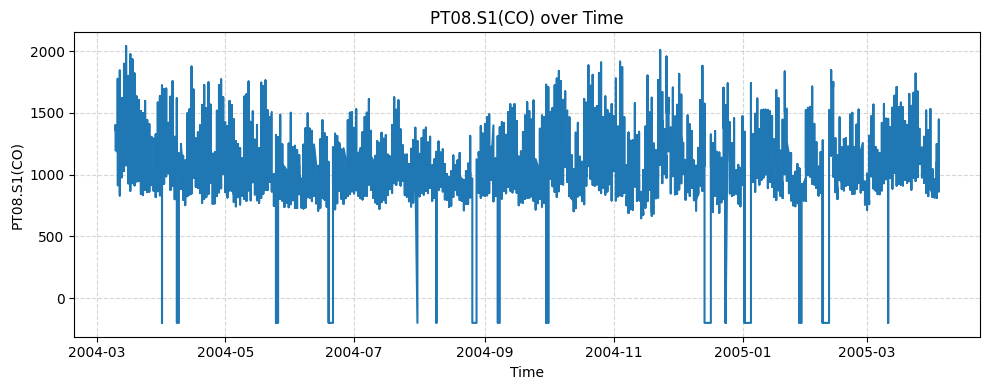

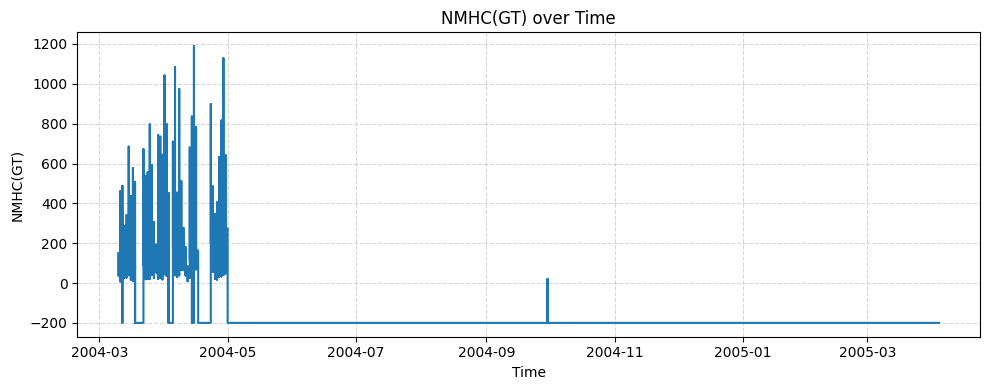

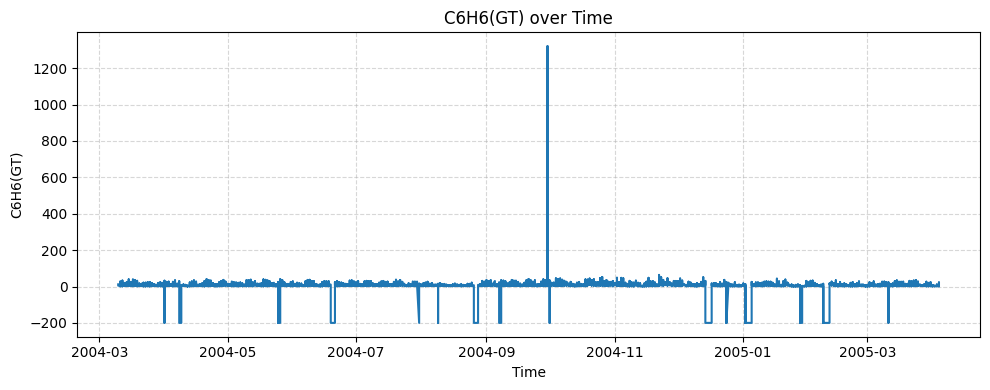

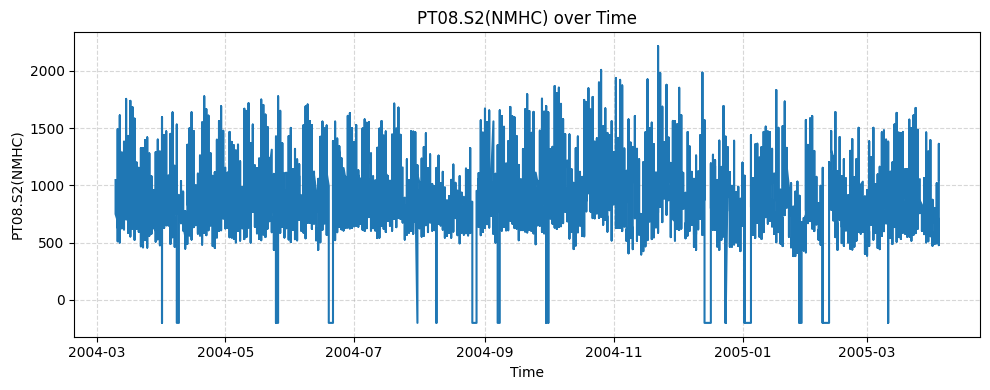

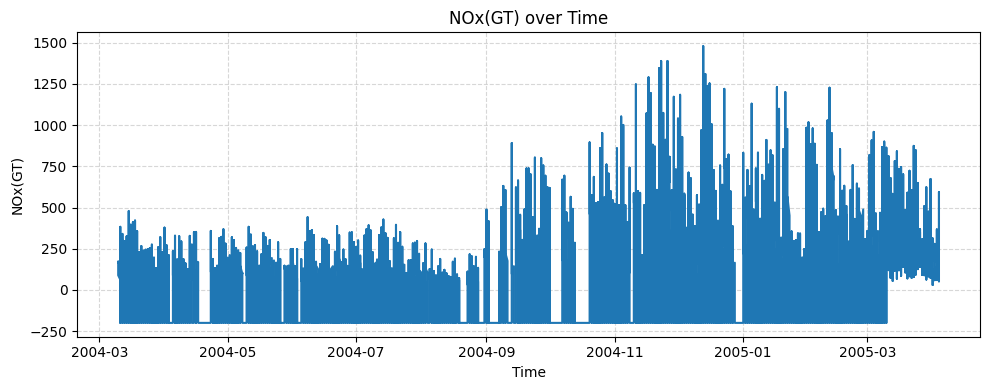

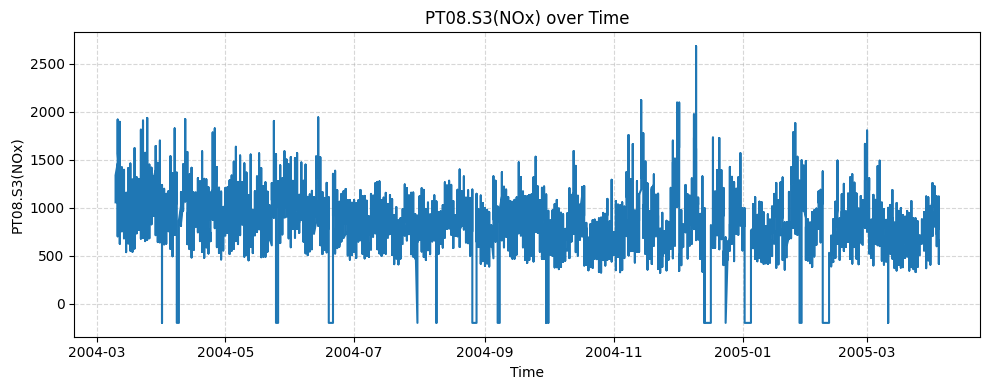

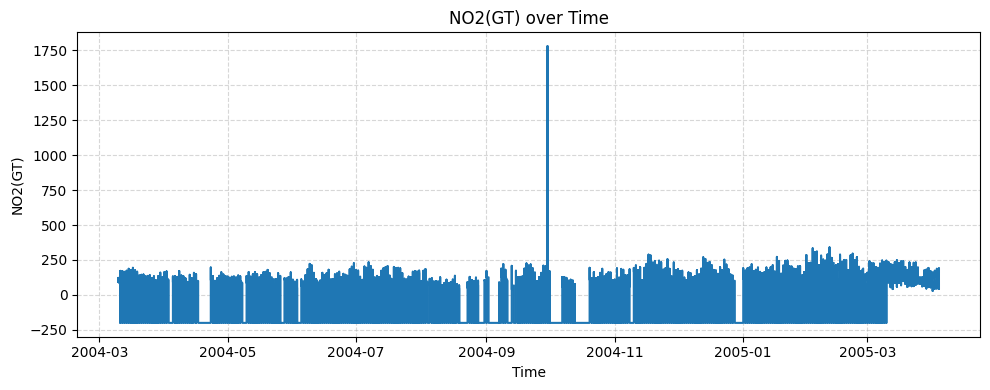

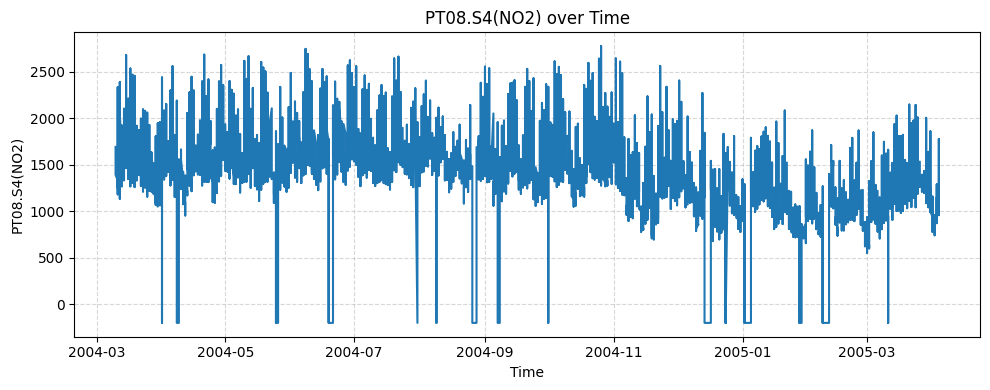

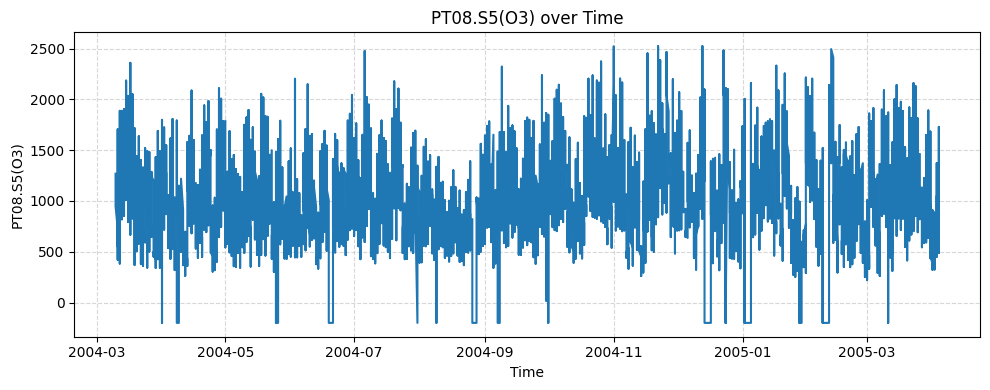

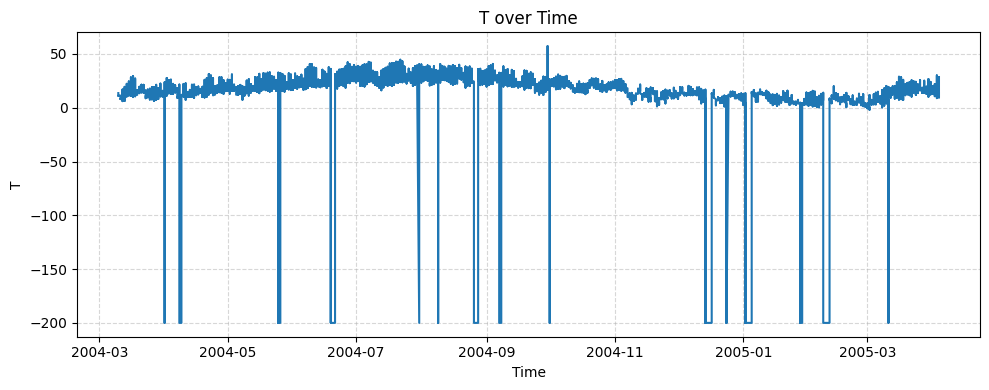

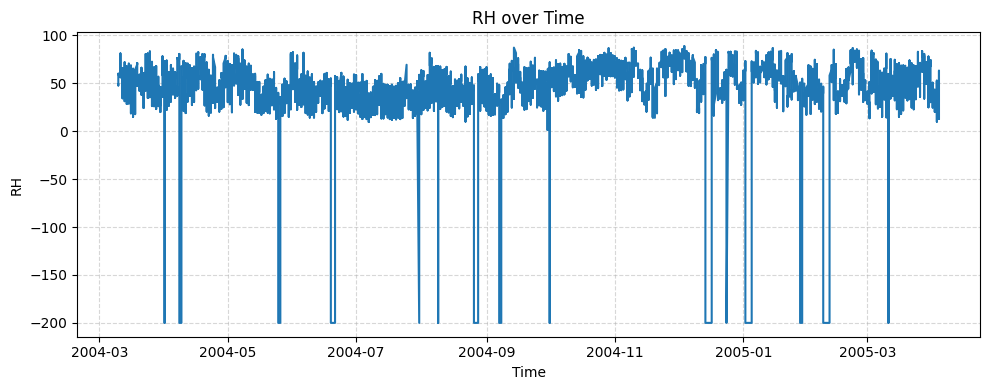

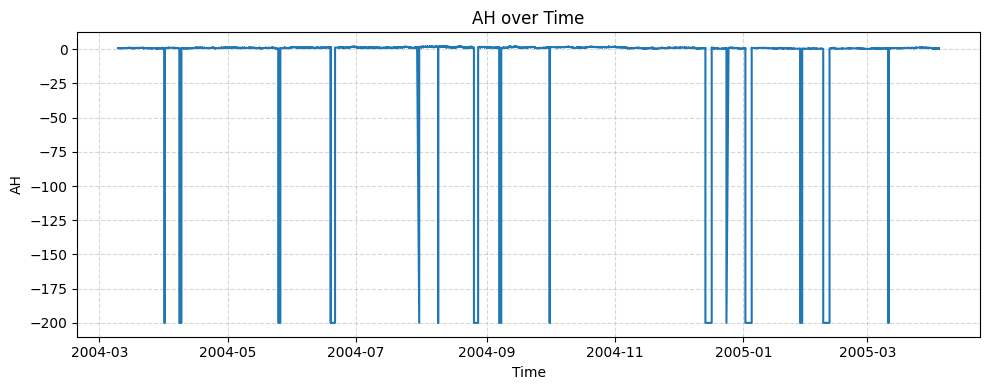

In [40]:
cols_to_plot = [c for c in df.columns if c != 'Time']
print("Columns to plot:", cols_to_plot)


for col in cols_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col])
    plt.title(f"{col} over Time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    
    plt.show()